# Redshift Data of DESIJ1501+5208

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
!pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 28.9 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [3]:
data, header = fits.getdata("/kaggle/input/fits-file/DESIJ15015208_F140W_drz_sci.fits", header=True)

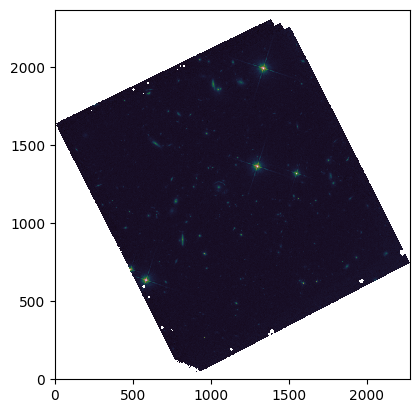

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [5]:
FILENAME = "/kaggle/input/phot-z/photo_z_DESIJ15015208.csv"  # need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.007664,8001592628000119,225.409408,52.134710,8001,592628,119,REX,0.302,R3,0.233,0.112,1,1
1,0.007153,8001592628000120,225.412517,52.136677,8001,592628,120,PSF,0.001,P3,1.007,0.222,1,1
2,0.007304,8001592628000130,225.399816,52.134868,8001,592628,130,PSF,0.184,P2,0.517,1.370,1,0
3,0.006128,8001592628000131,225.401354,52.135787,8001,592628,131,PSF,0.003,P3,1.117,0.290,1,1
4,0.006926,8001592628000170,225.414969,52.139660,8001,592628,170,EXP,0.002,E3,0.312,0.054,1,1


In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

Canvas(toolbar=None)

In [7]:
# In degrees
center_x, center_y = 225.4041667, 52.1416667  # RA 15:01:37 DEC 52:08:30
radii = 30  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

841.3305174920902 1301.588281723355


In [8]:
data_legacy_cropped = data_legacy[(data_legacy["RAJ2000"] < x_upper) & (data_legacy["RAJ2000"] > x_lower) & (data_legacy["DEJ2000"] < y_upper) & (data_legacy["DEJ2000"] > y_lower)]

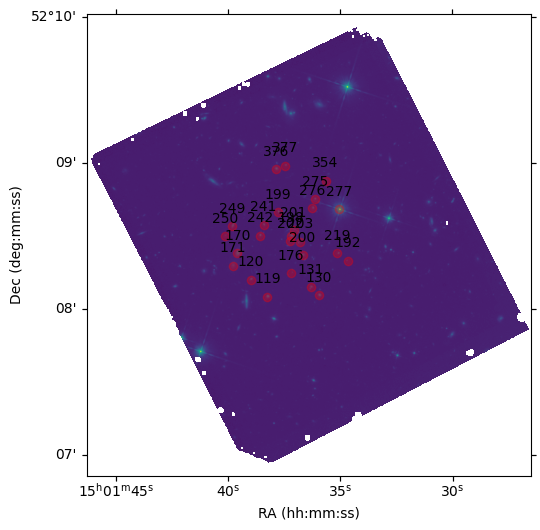

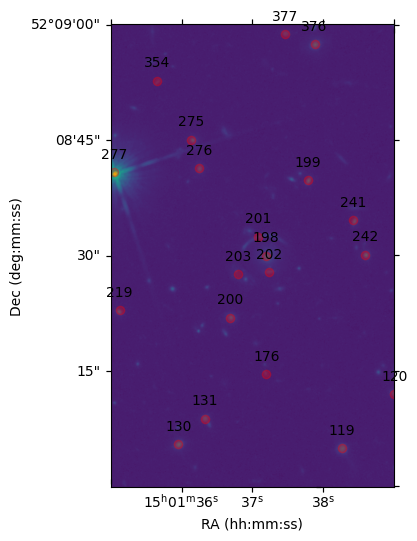

In [9]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [10]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 198
object_ids = [central_deflector_id,
              203, 202, 200, 199]  

columns_to_drop = [
    "id",
    "release",
    "brickid",
    "fclean",
    "fqual"
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r     RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                     
198    0.000487  225.404960  52.141661  DEV  0.007      D6  0.752    0.073
200    0.002384  225.402848  52.139424  REX  0.001      R6  0.971    0.113
202    0.000852  225.405138  52.141058  REX  0.971      R5  1.039    0.351
199    0.003372  225.407409  52.144389  REX  0.019      R4  0.903    0.100
203    0.000840  225.403328  52.141003  REX  0.041      R9  0.178    0.141


In [11]:
zphot_deflector = selected_data_legacy.loc[central_deflector_id, "zphot"]
del_z = 0.03 * (1 + zphot_deflector)
print("zphot_deflector:", zphot_deflector)
print("del_z:", del_z)
data_legacy_cropped_dropped = data_legacy_cropped.drop(columns=columns_to_drop)
data_legacy_cropped_dropped.set_index("objid", inplace=True)
# selected_data_legacy.set_index("objid", inplace=True)

not_neighbour_data_legacy = data_legacy_cropped_dropped[
    (data_legacy_cropped_dropped["zphot"] <= zphot_deflector - del_z) |
    (data_legacy_cropped_dropped["zphot"] >= zphot_deflector + del_z)
]

print(not_neighbour_data_legacy)

zphot_deflector: 0.752
del_z: 0.052559999999999996
             _r     RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                     
119    0.007664  225.409408  52.134710  REX  0.302      R3  0.233    0.112
130    0.007304  225.399816  52.134868  PSF  0.184      P2  0.517    1.370
131    0.006128  225.401354  52.135787  PSF  0.003      P3  1.117    0.290
176    0.004310  225.404981  52.137385  PSF  0.001      P7  1.535    0.580
200    0.002384  225.402848  52.139424  REX  0.001      R6  0.971    0.113
202    0.000852  225.405138  52.141058  REX  0.971      R5  1.039    0.351
241    0.003857  225.410099  52.142941  REX  0.061      R4  0.813    0.113
242    0.004072  225.410802  52.141694  PSF  0.000      P2  1.460    0.345
199    0.003372  225.407409  52.144389  REX  0.019      R4  0.903    0.100
201    0.000712  225.404526  52.142344  EXP  0.320      E4  0.181    0.082
203    0.000840  225.403328  52.141003  REX  0.04

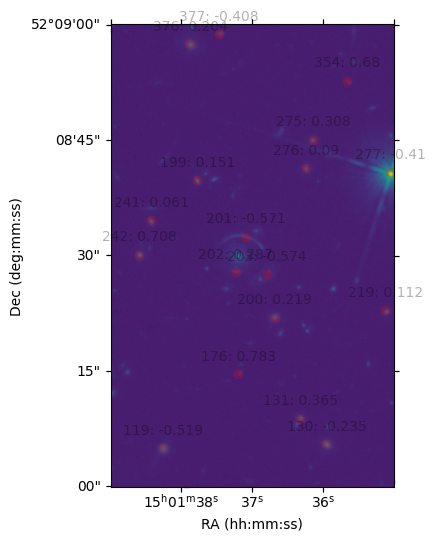

In [12]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.2
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[i]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]  
    plt.annotate(
        f"{obj_id}: {round(zphot - zphot_deflector, 3)}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center", alpha =0.3
    )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

## Save the Redshift data to the YAML file

In [13]:
# Existing YAML file with other parameters
existing_yaml_file = "/kaggle/input/point-estimates/DESIJ15015208_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id,'zphot']
e_zphot = selected_data_legacy.loc[central_deflector_id,'e_zphot']

environment_variables = {
    "z_phot": [z_phot, e_zphot]
}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
# with open(existing_yaml_file, "w") as file:
#     yaml.dump(existing_content, file, default_flow_style=False)